In this project, we aim to build a model that uses AI and government data to predict young people's likely choices when making education and training decisions. Our goal is to provide insights into potential employment and financial outcomes.


In [507]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

reading the dataset loading and exploring the dataset


In [508]:
# Load the dataset
df = pd.read_csv("15-19.csv")


In [509]:
print(df.shape) 

(2835, 11)


In [510]:
# View the first few rows to understand the data structure
print(df.head())

     Provider type State/territory of delivery location       Age group  \
0  TAFE institutes                      New South Wales  15 to 19 years   
1  TAFE institutes                      New South Wales  15 to 19 years   
2  TAFE institutes                      New South Wales  15 to 19 years   
3  TAFE institutes                      New South Wales  15 to 19 years   
4  TAFE institutes                      New South Wales  15 to 19 years   

        Previous highest education level Level of education   Year  2019  \
0  Bachelor degree / Higher degree level             Totals    NaN    30   
1  Bachelor degree / Higher degree level            Diploma    NaN     -   
2  Bachelor degree / Higher degree level     Certificate IV    NaN     5   
3  Bachelor degree / Higher degree level    Certificate III    NaN    15   
4  Bachelor degree / Higher degree level     Certificate II    NaN     -   

   2020  2021  2022  2023  
0    25    15    20    20  
1     5     -     -     -  
2    10 

In [511]:
# View the last few rows to understand the data structure
print(df.tail())

                   Provider type State/territory of delivery location  \
2830  Private training providers                            Not known   
2831  Private training providers                            Not known   
2832  Private training providers                            Not known   
2833  Private training providers                            Not known   
2834  Private training providers                            Not known   

           Age group Previous highest education level Level of education  \
2830  15 to 19 years                  Year 9 or lower     Certificate II   
2831  15 to 19 years                        Not known             Totals   
2832  15 to 19 years                        Not known   Advanced diploma   
2833  15 to 19 years                        Not known    Certificate III   
2834  15 to 19 years                        Not known     Certificate II   

       Year  2019  2020  2021  2022  2023  
2830    NaN     5     5    20    10     5  
2831    NaN    3

Data cleaning and preprocessing


In [512]:
#Observing the shape of the dataset before removing duplicates
print(f"Before removing duplicates: {df.shape}")

Before removing duplicates: (2835, 11)


In [513]:
# Removing duplicate rows if any
df = df.drop_duplicates()

In [514]:
#Obeserving the shape of the dataset after removing duplicates
print(f"After removing duplicates: {df.shape}")

After removing duplicates: (2835, 11)


The shape of the Dataset remains the same as it does not have duplicate values.
Key observations about Data Description

The file contains 2835 of 15-19 details from all over aus from 4 years 2019-2023
There are 11 attributes and they are outlined below:
Provider type,
State/territory of delivery location,
Age group,
Previous highest education level,
Level of education,
Year, 
2019, 
2020, 
2021, 
2022, 
2023


In [515]:
# Check for missing values
print(df.isnull().sum())


Provider type                              0
State/territory of delivery location       0
Age group                                  5
Previous highest education level          60
Level of education                       115
 Year                                   2835
 2019                                      0
 2020                                      0
 2021                                      0
 2022                                      0
 2023                                      0
dtype: int64


out of all we can see that there are some missing values in the Previous highest education level and Level of education also as in year

In [516]:
# Summary statistics
print(df.describe())

       Year
count   0.0
mean    NaN
std     NaN
min     NaN
25%     NaN
50%     NaN
75%     NaN
max     NaN


Model Selection and Training
Split data into features and target variable:

In [517]:
X = df.iloc[:, :-1]  # Assuming the last column is the target variable
y = df.iloc[:, -1]

In [518]:
# Check if data is empty
if X.shape[0] == 0 or y.shape[0] == 0:
    print("Error: Data seems empty. Check data loading process.")
    exit()

In [519]:
# Handle missing values (optional)
data = pd.concat([X, y], axis=1)  # Combine features and target
data.fillna(method='ffill', inplace=True)  # Fill missing values with previous value
X = data.iloc[:, :-1]  # Separate features again
y = data.iloc[:, -1]  # Separate target variable again

Encoding categorical features

each features has unique values are mapped to intergers

In [520]:
# Convert categorical features to numerical values
label_encoders = {}
categorical_features = ['Provider type', 'State/territory of delivery location', 'Age group', 'Previous highest education level', 'Level of education']

for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

Handling numeric data to remove commas from numeric and convert them to numeric types

In [521]:
# Convert target labels to numerical values
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)


In [522]:
#Encode the target variable
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

In [523]:
# remove commas and convert to numeric data in csv
def clean_numeric(column):
    return pd.to_numeric(column.replace(',', ''), errors='coerce')

# Apply the function to the relevant columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(clean_numeric)

Spitting scalling

so herr the data split into training and testing sets with 30% for testing 

features are scaled to have xero mean and unit variance using standardscaler



In [524]:
#Split the data into training and testing sets:


X = df.drop(columns=['Level of education'])  # Features
y = df['Level of education']  # Target variable 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [525]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train a Machine Learning Model and evaluating them

In [526]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

evaluate the model

In [527]:
# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Check for unseen labels in predictions
# For target column
try:
    unique_labels_y = label_encoder_y.inverse_transform(y_test)
    unseen_labels_y = set(unique_labels_y) - set(label_encoder_y.classes_)
    if unseen_labels_y:
        print(f"Unseen labels in test target data: {unseen_labels_y}")
except Exception as e:
    print(f"Error checking unseen labels in target: {e}")

# For features 
for column, le in label_encoders.items():
    try:
        unique_labels_X = le.inverse_transform(X_test[:, X.columns.get_loc(column)])
        unseen_labels_X = set(unique_labels_X) - set(le.classes_)
        if unseen_labels_X:
            print(f"Unseen labels in test feature column '{column}': {unseen_labels_X}")
    except Exception as e:
        print(f"Error checking unseen labels in feature column '{column}': {e}")

Accuracy: 0.22
Error checking unseen labels in feature column 'Provider type': y contains previously unseen labels: [-1.63001395 -0.98962827 -0.34924259  0.29114309  0.93152877  1.57191445]
Error checking unseen labels in feature column 'State/territory of delivery location': y contains previously unseen labels: [-1.55028246 -1.28474155 -1.01920063 -0.75365972 -0.48811881 -0.22257789
  0.04296302  0.30850393  0.57404485  0.83958576  1.10512667  1.37066759]
Error checking unseen labels in feature column 'Age group': y contains previously unseen labels: [-0.1373782  6.3521062 12.8415906]
Error checking unseen labels in feature column 'Previous highest education level': y contains previously unseen labels: [-1.9464922  -1.71373904 -1.48098587 -1.2482327  -1.01547954 -0.78272637
 -0.54997321 -0.31722004 -0.08446687  0.14828629  0.38103946  0.61379262
  0.84654579  1.07929895  1.31205212  1.54480529]
Error checking unseen labels in feature column 'Level of education': 'Level of education'


Confusion Matrix:
[[ 4  6  4  4  5  1  0  0  6  5  0]
 [ 2 15 15 15 13  4  0  0  8 14  0]
 [ 3 20 29 19  7  3  0  0  7 52  0]
 [ 1 14 23 22  9  6  0  0  3 61  0]
 [ 3 11  9  9  8 15  0  0 18 13  0]
 [ 7  9  7 10 14  9  0  0  9 14  0]
 [ 1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  1  1  0  1  1  0  0]
 [ 5  8  9 10  5 10  0  0 22 15  0]
 [ 3 13 22 44  9  9  0  0  9 51  1]
 [ 0  0  3  0  1  0  0  0  1  0 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.11      0.12        35
           1       0.16      0.17      0.16        86
           2       0.24      0.21      0.22       140
           3       0.17      0.16      0.16       139
           4       0.11      0.09      0.10        86
           5       0.16      0.11      0.13        79
           6       0.00      0.00      0.00         1
           7       1.00      0.17      0.29         6
           8       0.26      0.26      0.26        84
           9       0.

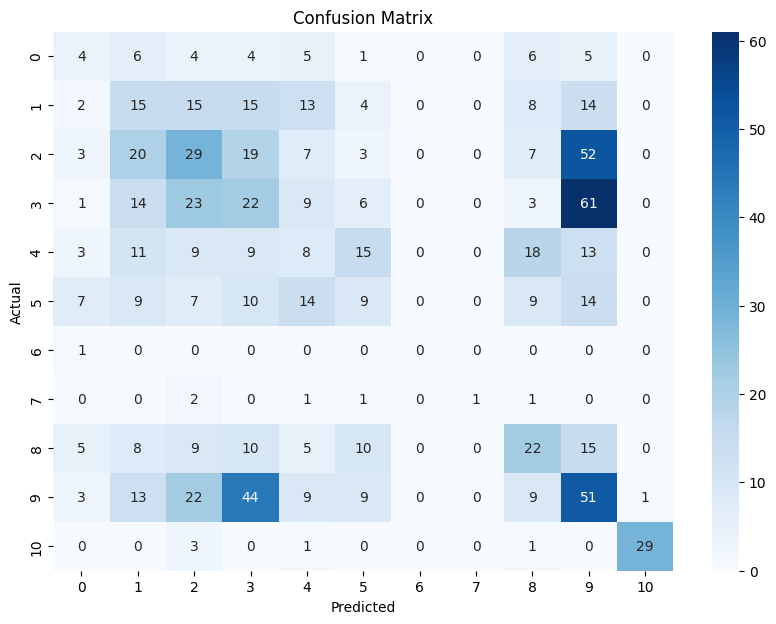

In [528]:
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

# visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


predictions and made on the test data and model performance is evaluated using accurancy confusion matrix and classification report

next we use the model to predict future outcomes:

In [529]:
# Check for unseen labels in predictions
y_test_decoded = target_encoder.inverse_transform(y_test)
unseen_labels = set(y_test_decoded) - set(target_encoder.classes_)
if unseen_labels:
    print(f"Unseen labels in test data: {unseen_labels}")

In [530]:


# Check the shape of X_train
print("X_train shape:", X_train.shape)

# Make sure new_data has the same number of features as X_train
new_data = pd.DataFrame({
    'Provider type': [0],  # Example values
    'State/territory of delivery location': [0],  # Example values
    'Age group': [0],  # Example values
    'Previous highest education level': [0],  # Example values
    'Some feature': [0]  # Add any missing features
})
new_data = new_data.reindex(columns=X.columns, fill_value=0)

# Scale the new data using the trained scaler
new_data_scaled = scaler.transform(new_data)

# Make predictions using the trained model
predictions = model.predict(new_data_scaled)

print("Predictions:", predictions)


X_train shape: (1984, 10)
Predictions: [9]


Hyperparameter tuning with grindsearchcv

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

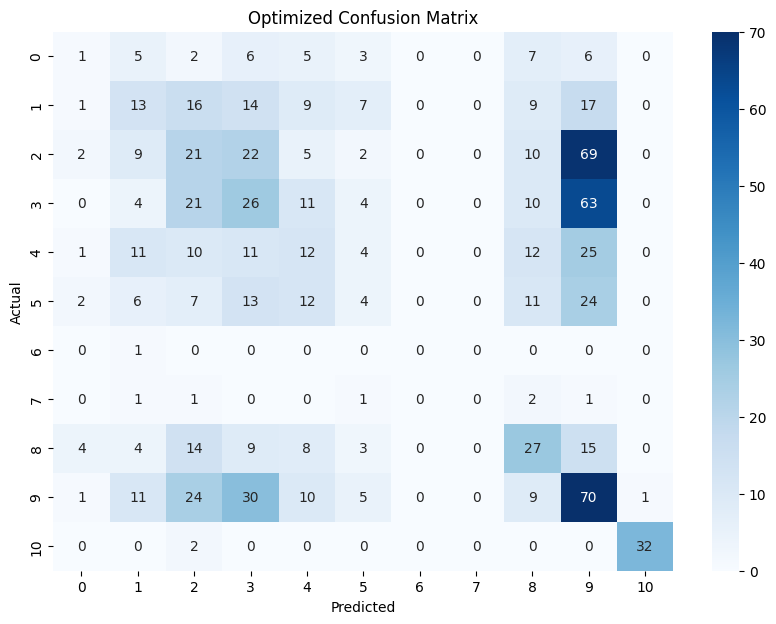

In [531]:


# Define the parameter grid based on your model and dataset
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

# Initialize the RandomForestClassifier (already defined in your script)
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV using your defined RandomForestClassifier and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
print("Best Hyperparameters from GridSearchCV:", grid_search.best_params_)

# Use the best estimator (model with the best hyperparameters)
best_rf = grid_search.best_estimator_

# Predict and evaluate the optimized model on the test data
y_pred_optimized = best_rf.predict(X_test)

# Evaluate the optimized model
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {optimized_accuracy:.2f}")

# Confusion Matrix and Classification Report for the optimized model
print("Optimized Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_optimized))

print("Optimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))

# Visualize the optimized confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred_optimized), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Optimized Confusion Matrix')
plt.show()


now we have to optimise model now for us is to predict and analyze th eperformance and create plot for better visual

feature importance

are extracted from the optimized modal to understand which features most influence the predictions

Confusion Matrix:
[[ 1  5  2  6  5  3  0  0  7  6  0]
 [ 1 13 16 14  9  7  0  0  9 17  0]
 [ 2  9 21 22  5  2  0  0 10 69  0]
 [ 0  4 21 26 11  4  0  0 10 63  0]
 [ 1 11 10 11 12  4  0  0 12 25  0]
 [ 2  6  7 13 12  4  0  0 11 24  0]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  0  0  1  0  0  2  1  0]
 [ 4  4 14  9  8  3  0  0 27 15  0]
 [ 1 11 24 30 10  5  0  0  9 70  1]
 [ 0  0  2  0  0  0  0  0  0  0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.03      0.04        35
           1       0.20      0.15      0.17        86
           2       0.18      0.15      0.16       140
           3       0.20      0.19      0.19       139
           4       0.17      0.14      0.15        86
           5       0.12      0.05      0.07        79
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         6
           8       0.28      0.32      0.30        84
           9       0.

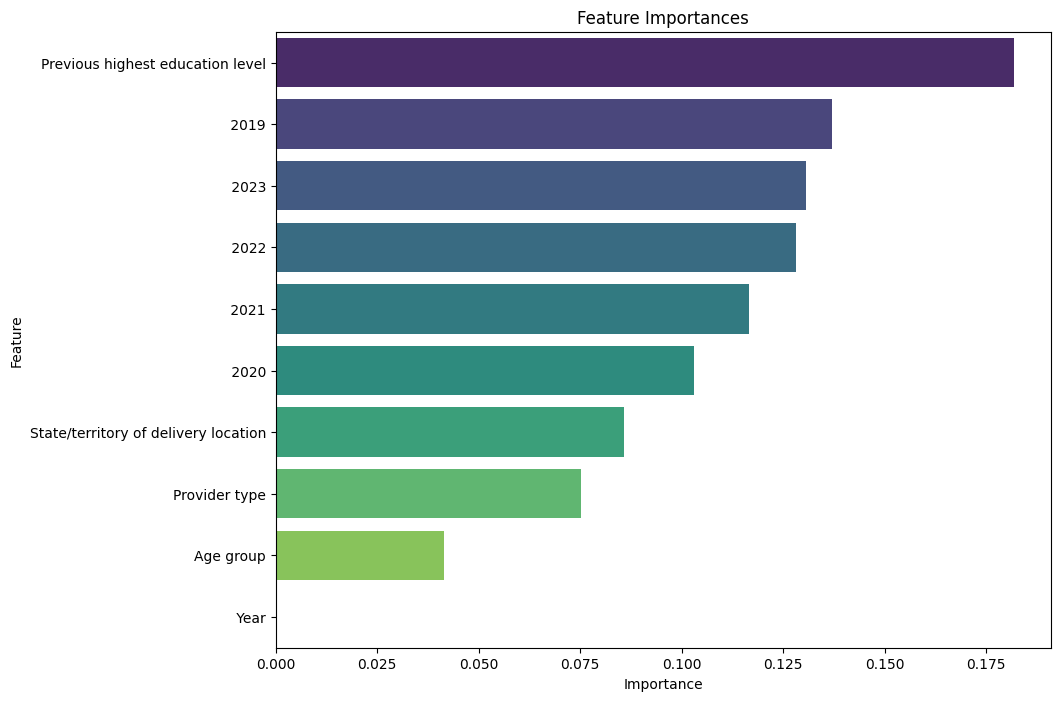

In [532]:
# Predict with the optimized model
y_pred = best_rf.predict(X_test)

# Analyze performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


importances = best_rf.feature_importances_
feature_names = X.columns


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.show()

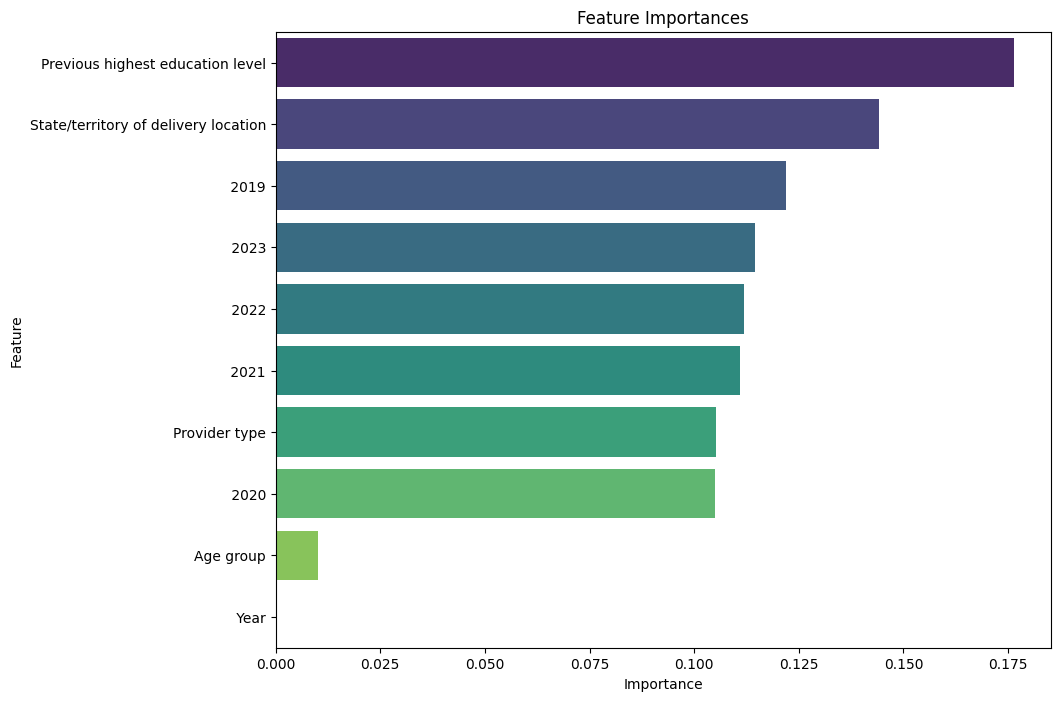

In [534]:
# Extract feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for easier visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Comparison between the two:

Model Used:

Performance Analysis:

1/ Includes additional performance evaluation metrics such as the confusion matrix, classification report, and accuracy score. This provides a comprehensive view of how well the model is performing.

2/ Focuses solely on the feature importances and their visualization. There is no performance analysis included.
Plot Labels:

1/ first one Provides a more complete analysis by not only visualizing feature importances but also evaluating model performance using metrics like the confusion matrix, classification report, and accuracy.

2/  Focuses solely on visualizing feature importances, with axis labels included for clarity